<a href="https://colab.research.google.com/github/jonamadk/Speech-Stress-Analysis/blob/preet/whisperx_playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install git+https://github.com/m-bain/whisperX.git
from IPython.display import clear_output
clear_output()

In [ ]:
!apt-get install -y espeak-ng
# !apt-get install -y festival
clear_output()

In [ ]:
!pip install phonemizer
from IPython.display import clear_output

clear_output()

In [ ]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import whisperx
# from phonemizer import phonemize
from google.colab import drive


device = "cpu"

# compute_type = "int8"
# Let's try float32
compute_type = "float32"

# 1. Transcribe with original whisper (batched)
model = whisperx.load_model("medium", device, compute_type=compute_type, language="en")



/usr/local/lib/python3.12/dist-packages/pyannote/audio/core/io.py:212: UserWarning: torchaudio._backend.list_audio_backends has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. The decoding and encoding capabilities of PyTorch for both audio and video are being consolidated into TorchCodec. Please see https://github.com/pytorch/audio/issues/3902 for more information. It will be removed from the 2.9 release. 
  torchaudio.list_audio_backends()
/usr/local/lib/python3.12/dist-packages/speechbrain/utils/torch_audio_backend.py:57: UserWarning: torchaudio._backend.list_audio_backends has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. The decoding and encoding capabilities of PyTorch for both audio and video are being consolidated into TorchCodec. Please see https://github.com/pytorch/audio/issues/3902 for more information. It will be removed fr

tokenizer.json: 0.00B [00:00, ?B/s]

vocabulary.txt: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.bin:   0%|          | 0.00/1.53G [00:00<?, ?B/s]

>>Performing voice activity detection using Pyannote...


INFO:pytorch_lightning.utilities.migration.utils:Lightning automatically upgraded your loaded checkpoint from v1.5.4 to v2.5.5. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint ../usr/local/lib/python3.12/dist-packages/whisperx/assets/pytorch_model.bin`


Model was trained with pyannote.audio 0.0.1, yours is 3.4.0. Bad things might happen unless you revert pyannote.audio to 0.x.
Model was trained with torch 1.10.0+cu102, yours is 2.8.0+cu126. Bad things might happen unless you revert torch to 1.x.


In [ ]:
# Loading phonemizer's seperator
from phonemizer import phonemize
from phonemizer.separator import Separator
# separator = Separator(syllable='-', word='|', phone='')

audio_file = "/content/drive/MyDrive/Prosody-research/common_voice_en_37306194.wav"
batch_size = 16  # reduce if low on GPU mem
audio = whisperx.load_audio(audio_file)

transcript = model.transcribe(audio, batch_size=batch_size)["segments"]
print(transcript)  # ' It is also plausible that John was already born there.'

# Use phonemize to get the transcript in terms of phonemes
phone_transcript = [
    {
        # "text": phonemize(segment["text"], backend="espeak", separator=separator),
        "text": phonemize(segment["text"], language="en-us"),
        "start": segment["start"],
        "end": segment["end"],
    }
    for segment in transcript
]

print(phone_transcript)  # 'ɪɾ ɪz ɔːlsoʊ plɔːzᵻbəl ðæt dʒɑːn wʌz ɔːlɹɛdi bɔːɹn ðɛɹ'

# 2. Align whisper output
model_a, metadata = whisperx.load_align_model(
    # model_name="facebook/wav2vec2-xlsr-53-espeak-cv-ft",
    model_name="facebook/wav2vec2-lv-60-espeak-cv-ft",
    language_code="en",
    device=device,
)
print(metadata)

result = whisperx.align(
    phone_transcript, model_a, metadata, audio, device, return_char_alignments=True
    ,print_progress=True, combined_progress=True
)

print(result["segments"])  # after alignment


[{'text': ' It is also plausible that John was already born there.', 'start': 0.942, 'end': 5.532}]
[{'text': 'ɪɾ ɪz ɔːlsoʊ plɔːzᵻbəl ðæt dʒɑːn wʌz ɔːlɹɛdi bɔːɹn ðɛɹ ', 'start': 0.942, 'end': 5.532}]


Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/212 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/321 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

{'language': 'en', 'dictionary': {'<s>': 1, '<pad>': 0, '</s>': 2, '<unk>': 3, 'n': 280, 's': 208, 't': 6, 'ə': 7, 'l': 8, 'a': 9, 'i': 10, 'k': 11, 'd': 12, 'm': 13, 'ɛ': 14, 'ɾ': 15, 'e': 16, 'ɪ': 17, 'p': 18, 'o': 19, 'ɐ': 20, 'z': 21, 'ð': 22, 'f': 23, 'j': 24, 'v': 25, 'b': 26, 'ɹ': 27, 'ʁ': 28, 'ʊ': 29, 'iː': 30, 'r': 31, 'w': 32, 'ʌ': 33, 'u': 34, 'ɡ': 35, 'æ': 36, 'aɪ': 37, 'ʃ': 38, 'h': 39, 'ɔ': 40, 'ɑː': 41, 'ŋ': 42, 'ɚ': 43, 'eɪ': 44, 'β': 45, 'uː': 46, 'y': 47, 'ɑ̃': 48, 'oʊ': 49, 'ᵻ': 50, 'eː': 51, 'θ': 52, 'aʊ': 53, 'ts': 219, 'oː': 55, 'ɔ̃': 56, 'ɣ': 57, 'ɜ': 58, 'ɑ': 59, 'dʒ': 60, 'əl': 61, 'x': 326, 'ɜː': 63, 'ç': 64, 'ʒ': 65, 'tʃ': 66, 'ɔː': 67, 'ɑːɹ': 68, 'ɛ̃': 69, 'ʎ': 70, 'ɔːɹ': 71, 'ʋ': 72, 'aː': 73, 'ɕ': 74, 'œ': 75, 'ø': 76, 'oːɹ': 77, 'ɲ': 78, 'yː': 79, 'ʔ': 80, 'iə': 81, 'i5': 82, 's.': 83, 'tɕ': 84, '??': 85, 'nʲ': 86, 'ɛː': 87, 'œ̃': 88, 'ɭ': 89, 'ɔø': 90, 'ʑ': 91, 'tʲ': 92, 'ɨ': 93, 'ɛɹ': 94, 'ts.': 95, 'rʲ': 96, 'ɪɹ': 97, 'ɭʲ': 98, 'i.5': 99, 'ɔɪ': 100, 'q

Let's use a different approach now. Let's try using G2P, since it contains ARPAbet and try to see if the wav2vec base model actually performs better.

Looking back at this, this approach would not be the best because there is no model that actually has a vocabulary for ARPAbet phonemes. The characters for the base model represent characters itself, not phonemes. For the IPA format, there are phoneme models that actually have the vocabulary. So, I think mapping is the way to go with the process.

There is a python library that converts phonemes with different dictionaries like IPA to ARPAbet plus some other ones: https://pypi.org/project/phonecodes/

In [ ]:
phn = phonemize(
    "It is plausible that the cure was right there.",
)
phn

'ɪɾ ɪz plɔːzᵻbəl ðætðə kjʊɹ wʌz ɹaɪt ðɛɹ '

In [ ]:
# Let's use the phonecodes library
!pip install phonecodes
clear_output()

In [ ]:
from phonecodes import phonecodes
print(phone_transcript[0]["text"])
phonecodes.convert(phone_transcript[0]["text"], "ipa", "arpabet", "eng") # convert from IPA to ARPABET with language explicitly specified

# TODO: Use characters as the input for phonecodes from the whisperx.align() output.


ɪɾ ɪz ɔːlsoʊ plɔːzᵻbəl ðæt dʒɑːn wʌz ɔːlɹɛdi bɔːɹn ðɛɹ 


'IHɾ IHZ AOːLSOW PLAOːZᵻBAH0L DHAET JHAAːN WAHZ AOːLREHDIY BAOːRN DHEHR '

Let's filter the colon "ː" symbol here. The colon symbol in IPA represents a long vowel or a phoneme with long length. The symbol does not have a direct conversion to ARPAbet. So for mapping, phonecodes cannot convert this colon symbol. Since this symbol by definition means to elongate the phoneme before it, we can just use the phoneme's corresponding map and add the both of their timestamps and elongate the phoneme. This means that the phoneme was actually spoken or produced to that amount of time, which infact represents the same definition and preserves accuracy.  


In [ ]:
hh = "ɪɾ ɪz plɔːzᵻbəl ðætðə kjʊɹ wʌz ɹaɪt ðɛɹ"
phonecodes.convert(hh, "ipa", "arpabet", "eng")

'IHɾ IHZ PLAOːZᵻBAH0L DHAETDHAH0 KYUHR WAHZ RAYT DHEHR'

Looking at the mapping generated by ARPAbet on a character level, I realised that there are a lot of errors. The way I was approaching this was wrong because I have to take in the consideration that phonemes contain both monopthongs and dipthongs. Let's take a reference as to how ARPABet is actually mapped. You can read it here:  https://huggingface.co/spaces/Harveenchadha/oiTrans/resolve/main/indic_nlp_resources/script/arpabet.pdf

Looking at the way how ARPAbet symbols have **dipthongs** and r-controlled vowels which sometimes behave like dipthongs, I think having a lookup table to check whether two characters are dipthongs or not is a good way to solve this issue. It is not perhaps the best way, but I think this can work.

In [ ]:
# Creating a lookup table for dipthongs and r-controlled vowels.

ipa2arpabet = {
    "ɑ": "AA",
    "æ": "AE",
    "ʌ": "AH",
    "ə": "AH0",
    "ɔ": "AO",
    "aʊ": "AW",
    "aɪ": "AY",
    "ɛ": "EH",
    "ɝ": "ER",
    "ɚ": "ER0",
    "eɪ": "EY",
    "ɪ": "IH",
    "ɨ": "IH0",
    "ᵻ": "IH0",
    "i": "IY",
    "oʊ": "OW",
    "ɔɪ": "OY",
    "ʊ": "UH",
    "u": "UW",
    "b": "B",
    "tʃ": "CH",
    "d": "D",
    "ð": "DH",
    "l̩": "EL",
    "m̩": "EM",
    "n̩": "EN",
    "f": "F",
    "ɡ": "G",
    "h": "HH",
    "dʒ": "JH",
    "k": "K",
    "l": "L",
    "m": "M",
    "n": "N",
    "ŋ": "NG",
    "p": "P",
    "ʔ": "Q",
    "ɹ": "R",
    "s": "S",
    "ʃ": "SH",
    "t": "T",
    "θ": "TH",
    "v": "V",
    "w": "W",
    "ʍ": "WH",
    "j": "Y",
    "z": "Z",
    "ʒ": "ZH",
}


In [ ]:
# We can do this process after converting IPA to ARPABET

# Function to map symbols in IPA to ARPAbet that don't have a direct mapping
def map_flap(prev_char, check_char, next_char):
    if check_char == "ᵻ":
      return "IH0"
    vowels = set("iɪeɛæaʌəɔoʊu")
    if prev_char in vowels and next_char in vowels:
        return "D"
    else:
        return "T"

In [ ]:
chars = result["segments"][0]["chars"]
mapped_chars = []
i = 0

while i < len(chars):
    char_segment = chars[i]
    if i == len(chars) - 1 and ('start' not in char_segment or 'end' not in char_segment):
      break

    # Try to form a diphthong (lookahead)
    if i + 1 < len(chars):
        twochar = chars[i]['char'] + chars[i+1]['char']
        if twochar in ipa2arpabet:
            arpabet = ipa2arpabet[twochar]
            mapped_chars.append({
                'char': arpabet,
                'start': chars[i]['start'],
                'end': chars[i+1]['end']  # span both chars
            })
            i += 2
            continue

    # Merging the colon into the previous phoneme
    if char_segment['char'] == "ː" and mapped_chars:
      # mapped_chars[-1]['char'] += char_segment['char']
      mapped_chars[-1]['end'] = char_segment['end']
      i += 1
      continue

    # Otherwise: single symbol mapping
    if char_segment['char'] in ipa2arpabet:
        arpabet = ipa2arpabet[char_segment['char']]
    elif char_segment['char'] == "ɾ":
        arpabet = map_flap(chars[i - 1]['char'], char_segment['char'], chars[i + 1]['char'])
    else:

        arpabet = char_segment['char']  # fallback

    mapped_chars.append({
        'char': arpabet,
        'start': char_segment['start'],
        'end': char_segment['end']
    })
    i += 1
mapped_chars

[{'char': 'IH', 'start': 0.942, 'end': 1.163},
 {'char': 'T', 'start': 1.163, 'end': 1.184},
 {'char': ' ', 'start': 1.184, 'end': 1.325},
 {'char': 'IH', 'start': 1.325, 'end': 1.345},
 {'char': 'Z', 'start': 1.345, 'end': 1.425},
 {'char': ' ', 'start': 1.425, 'end': 1.526},
 {'char': 'AO', 'start': 1.526, 'end': 1.566},
 {'char': 'L', 'start': 1.566, 'end': 1.626},
 {'char': 'S', 'start': 1.626, 'end': 1.727},
 {'char': 'OW', 'start': 1.727, 'end': 1.908},
 {'char': ' ', 'start': 1.908, 'end': 1.969},
 {'char': 'P', 'start': 1.969, 'end': 1.989},
 {'char': 'L', 'start': 1.989, 'end': 2.049},
 {'char': 'AO', 'start': 2.049, 'end': 2.452},
 {'char': 'Z', 'start': 2.452, 'end': 2.472},
 {'char': 'IH0', 'start': 2.472, 'end': 2.492},
 {'char': 'B', 'start': 2.492, 'end': 2.553},
 {'char': 'AH0', 'start': 2.553, 'end': 3.156},
 {'char': 'L', 'start': 3.156, 'end': 3.177},
 {'char': ' ', 'start': 3.177, 'end': 3.197},
 {'char': 'DH', 'start': 3.197, 'end': 3.217},
 {'char': 'AE', 'start':

In [ ]:
result['segments'][0]

{'start': 0.942,
 'end': 5.552,
 'text': 'ɪɾ ɪz ɔːlsoʊ plɔːzᵻbəl ðæt dʒɑːn wʌz ɔːlɹɛdi bɔːɹn ðɛɹ',
 'words': [{'word': 'ɪɾ',
   'start': 0.942,
   'end': 1.184,
   'score': np.float64(0.821)},
  {'word': 'ɪz', 'start': 1.325, 'end': 1.425, 'score': np.float64(0.892)},
  {'word': 'ɔːlsoʊ', 'start': 1.526, 'end': 1.908, 'score': np.float64(0.757)},
  {'word': 'plɔːzᵻbəl',
   'start': 1.969,
   'end': 3.177,
   'score': np.float64(0.692)},
  {'word': 'ðæt', 'start': 3.197, 'end': 3.479, 'score': np.float64(0.901)},
  {'word': 'dʒɑːn', 'start': 3.781, 'end': 3.921, 'score': np.float64(0.45)},
  {'word': 'wʌz', 'start': 3.942, 'end': 4.264, 'score': np.float64(0.9)},
  {'word': 'ɔːlɹɛdi',
   'start': 4.385,
   'end': 4.888,
   'score': np.float64(0.657)},
  {'word': 'bɔːɹn', 'start': 5.129, 'end': 5.472, 'score': np.float64(0.313)},
  {'word': 'ðɛɹ', 'start': 5.492, 'end': 5.552, 'score': np.float64(0.341)}],
 'chars': [{'char': 'ɪ', 'start': 0.942, 'end': 1.163, 'score': 0.726},
  {'char':

In [ ]:
# Let's filter the colon "ː"
# First we concatenate the phoneme and the colon symbol.
# Then we take the 'end' time of the colon and replace it with the end time of
# the phoneme.

# Also, for better optimization, the mapping done in this pass is the best.


chars = result["segments"][0]["chars"]
mapped_chars = []

i = 0
while i < len(chars):
  char_segment = chars[i]

  if i == len(chars) - 1 and ('start' not in char_segment or 'end' not in char_segment):
    break


  # Merging the colon into the previous phoneme
  if char_segment['char'] == "ː" and mapped_chars:
    # mapped_chars[-1]['char'] += char_segment['char']
    mapped_chars[-1]['end'] = char_segment['end']
    i += 1
    continue

  if char_segment['char'] == "ɾ" or char_segment["char"] == "ᵻ":
    print(char_segment['char'])
    # breakpoint()
    arpabet = map_flap(chars[i - 1]['char'], char_segment['char'], chars[i + 1]['char'])
  else:
  # Mapping ipa to arpabet
    arpabet = phonecodes.convert(char_segment['char'], "ipa", "arpabet", "eng")
  # arpabet = arpabet.replace("ː", "")
  mapped_chars.append({
      'char' : arpabet,
      'start' : char_segment['start'],
      'end' : char_segment['end']
  })
  i += 1

# Just storing the values for now
ipa_chars = result["segments"][0]["chars"]
# result["segments"][0]["chars"] = mapped_chars
# for i, char_segment in enumerate(chars):
mapped_chars

ɾ
ᵻ


[{'char': 'IH', 'start': 0.942, 'end': 1.163},
 {'char': 'T', 'start': 1.163, 'end': 1.184},
 {'char': ' ', 'start': 1.184, 'end': 1.325},
 {'char': 'IH', 'start': 1.325, 'end': 1.345},
 {'char': 'Z', 'start': 1.345, 'end': 1.425},
 {'char': ' ', 'start': 1.425, 'end': 1.526},
 {'char': 'AO', 'start': 1.526, 'end': 1.566},
 {'char': 'L', 'start': 1.566, 'end': 1.626},
 {'char': 'S', 'start': 1.626, 'end': 1.727},
 {'char': 'o', 'start': 1.727, 'end': 1.888},
 {'char': 'UH', 'start': 1.888, 'end': 1.908},
 {'char': ' ', 'start': 1.908, 'end': 1.969},
 {'char': 'P', 'start': 1.969, 'end': 1.989},
 {'char': 'L', 'start': 1.989, 'end': 2.049},
 {'char': 'AO', 'start': 2.049, 'end': 2.452},
 {'char': 'Z', 'start': 2.452, 'end': 2.472},
 {'char': 'IH0', 'start': 2.472, 'end': 2.492},
 {'char': 'B', 'start': 2.492, 'end': 2.553},
 {'char': 'AH0', 'start': 2.553, 'end': 3.156},
 {'char': 'L', 'start': 3.156, 'end': 3.177},
 {'char': ' ', 'start': 3.177, 'end': 3.197},
 {'char': 'DH', 'start': 

TypeError: set expected at most 1 argument, got 2

In [ ]:
# for c in mapped_chars:
#   print(c['char'])
mapped_chars

[{'char': 'IH', 'start': 0.942, 'end': 1.163},
 {'char': 'ɾ', 'start': 1.163, 'end': 1.184},
 {'char': ' ', 'start': 1.184, 'end': 1.325},
 {'char': 'IH', 'start': 1.325, 'end': 1.345},
 {'char': 'Z', 'start': 1.345, 'end': 1.425},
 {'char': ' ', 'start': 1.425, 'end': 1.526},
 {'char': 'AO', 'start': 1.526, 'end': 1.566},
 {'char': 'L', 'start': 1.566, 'end': 1.626},
 {'char': 'S', 'start': 1.626, 'end': 1.727},
 {'char': 'o', 'start': 1.727, 'end': 1.888},
 {'char': 'UH', 'start': 1.888, 'end': 1.908},
 {'char': ' ', 'start': 1.908, 'end': 1.969},
 {'char': 'P', 'start': 1.969, 'end': 1.989},
 {'char': 'L', 'start': 1.989, 'end': 2.049},
 {'char': 'AO', 'start': 2.049, 'end': 2.452},
 {'char': 'Z', 'start': 2.452, 'end': 2.472},
 {'char': 'ᵻ', 'start': 2.472, 'end': 2.492},
 {'char': 'B', 'start': 2.492, 'end': 2.553},
 {'char': 'AH0', 'start': 2.553, 'end': 3.156},
 {'char': 'L', 'start': 3.156, 'end': 3.177},
 {'char': ' ', 'start': 3.177, 'end': 3.197},
 {'char': 'DH', 'start': 3.

In [ ]:
!pip install praat-parselmouth
clear_output()

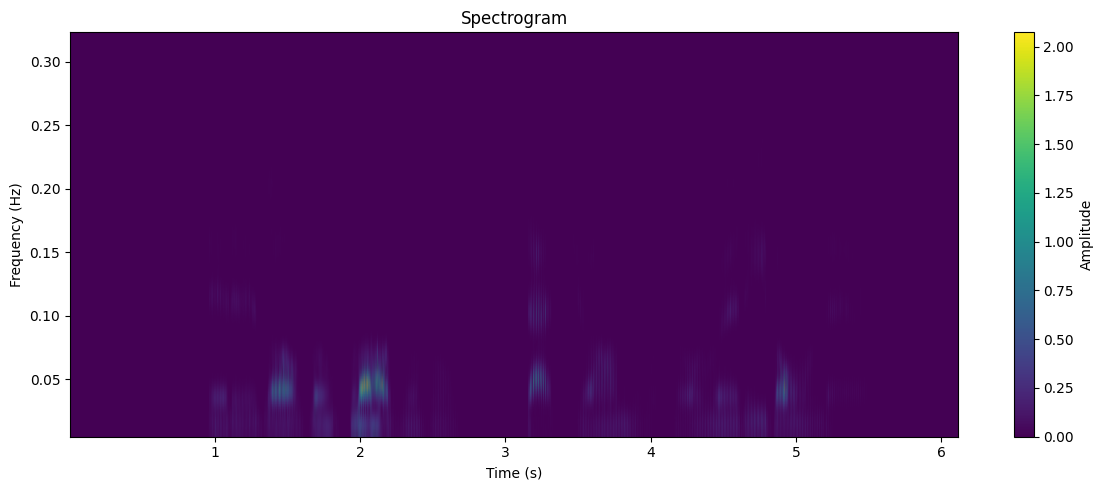

In [ ]:
import parselmouth
import numpy as np

audio_file = "/content/drive/MyDrive/Prosody-research/common_voice_en_37306194.wav"
# Load audio file using Parselmouth
snd = parselmouth.Sound(audio_file)

# 1. Pitch
pitch = snd.to_pitch() # You get F0 which is calculated per small slices like maybe every 10ms
pitch_values = pitch.selected_array['frequency'] # numpy array of estimated pitch frequency in hertz.
pitch_times = pitch.xs() # these are timestamps at which each pitch value was calculated, they are evenly spaced.
# pitch_times are also calculated upto the entire duration of the audio.

# 2. Intensity
intensity = snd.to_intensity() # Similarly, you calculate intensity which is also computed over small frames, like pitch.
intensity_values = intensity.values[0] # array of dB values measured over log scale.
intensity_times = intensity.xs() # Timestamps corresponding to each intensity value.

spectrogram = snd.to_spectrogram()
spectrum_matrix = spectrogram.values
frequencies = spectrogram.xs()[: spectrum_matrix.shape[0]]  # y-axis (Hz)
times = spectrogram.ts()  # x-axis (seconds)

# Plot the spectrogram
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 5))
plt.imshow(
    spectrum_matrix,
    origin="lower",  # Put 0 Hz at the bottom
    aspect="auto",
    extent=[times[0], times[-1], frequencies[0], frequencies[-1]],
    cmap="viridis",
)

plt.colorbar(label="Amplitude")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.title("Spectrogram")
plt.tight_layout()
plt.show()

Estimated syllable centers: [1.016 1.136 1.272 1.48  1.704 2.016 2.36  2.544 3.216 3.592 3.72  4.28
 4.552 4.768 4.92  5.224]


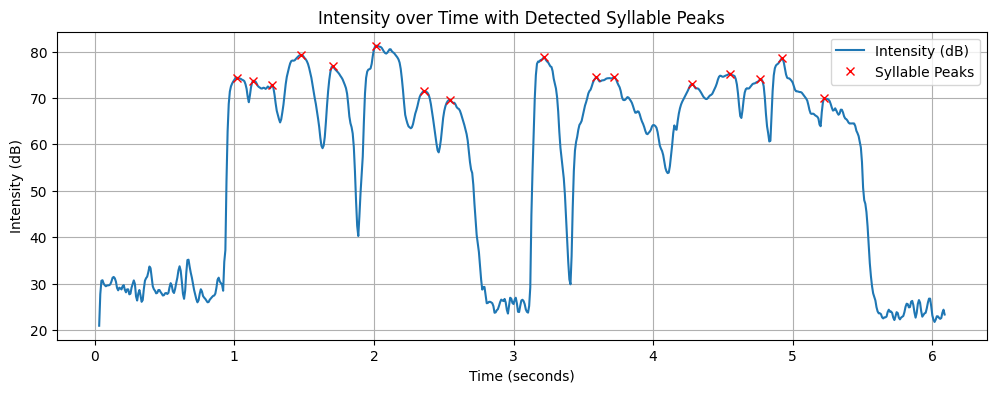

In [ ]:
# Detect peaks in intensity as syllable nuclei (very rough approximation)
from scipy.signal import find_peaks

# Only peaks with intensity above the 60th percentile of the entire intensity range is considered.
# Distance enforces a minimum seperation between detected peaks which prevents detecting peaks that are too close together.
syllable_peaks, _ = find_peaks(
    intensity_values, height=np.percentile(intensity_values, 60), distance=15
)

syllable_times = intensity_times[syllable_peaks]
print("Estimated syllable centers:", syllable_times)


# Plot the intensity contour over time
plt.figure(figsize=(12, 4))
plt.plot(intensity_times, intensity_values, label="Intensity (dB)")

# Mark detected syllable peaks on the intensity curve
plt.plot(syllable_times, intensity_values[syllable_peaks], "rx", label="Syllable Peaks")

plt.title("Intensity over Time with Detected Syllable Peaks")
plt.xlabel("Time (seconds)")
plt.ylabel("Intensity (dB)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.download('cmudict')
from nltk.corpus import cmudict
cmu_dict = cmudict.dict()


[nltk_data] Downloading package cmudict to /root/nltk_data...
[nltk_data]   Unzipping corpora/cmudict.zip.


In [ ]:
type(cmu_dict)

dict

In [ ]:
def syllabify(word):
    if word.lower() in cmu_dict:
       pronunciation = cmu_dict[word.lower()][0]
       if not pronunciation:
        return None
       phones = pronunciation
       syllables = []
       current_syllable = []
       return phones








In [ ]:
syllabify("tiger")

['T', 'AY1', 'G', 'ER0']

[{'center_time': np.float64(1.016),
  'intensity': 74.38749104948687,
  'phonemes': ['ɪɾ',
               'ɪz',
               'ɑːlsoʊ',
               'plɔːzəbəl',
               'ðæt',
               'dʒɑːn',
               'wʌz',
               'ɔːlɹɛdi',
               'bɔːɹn',
               'ðɛɹ'],
  'pitch': 93.84020172956923,
  'spectral_band_0': (),
  'syllable_index': 0,
  'text': 'ɪɾ ɪz ɑːlsoʊ plɔːzəbəl ðæt dʒɑːn wʌz ɔːlɹɛdi bɔːɹn ðɛɹ'},
 {'center_time': np.float64(1.1360000000000001),
  'intensity': 73.69425609713818,
  'phonemes': ['ɪɾ',
               'ɪz',
               'ɑːlsoʊ',
               'plɔːzəbəl',
               'ðæt',
               'dʒɑːn',
               'wʌz',
               'ɔːlɹɛdi',
               'bɔːɹn',
               'ðɛɹ'],
  'pitch': 102.20183013276127,
  'spectral_band_0': (),
  'syllable_index': 1,
  'text': 'ɪɾ ɪz ɑːlsoʊ plɔːzəbəl ðæt dʒɑːn wʌz ɔːlɹɛdi bɔːɹn ðɛɹ'},
 {'center_time': np.float64(1.272),
  'intensity': 72.81570161878724,
  'phoneme

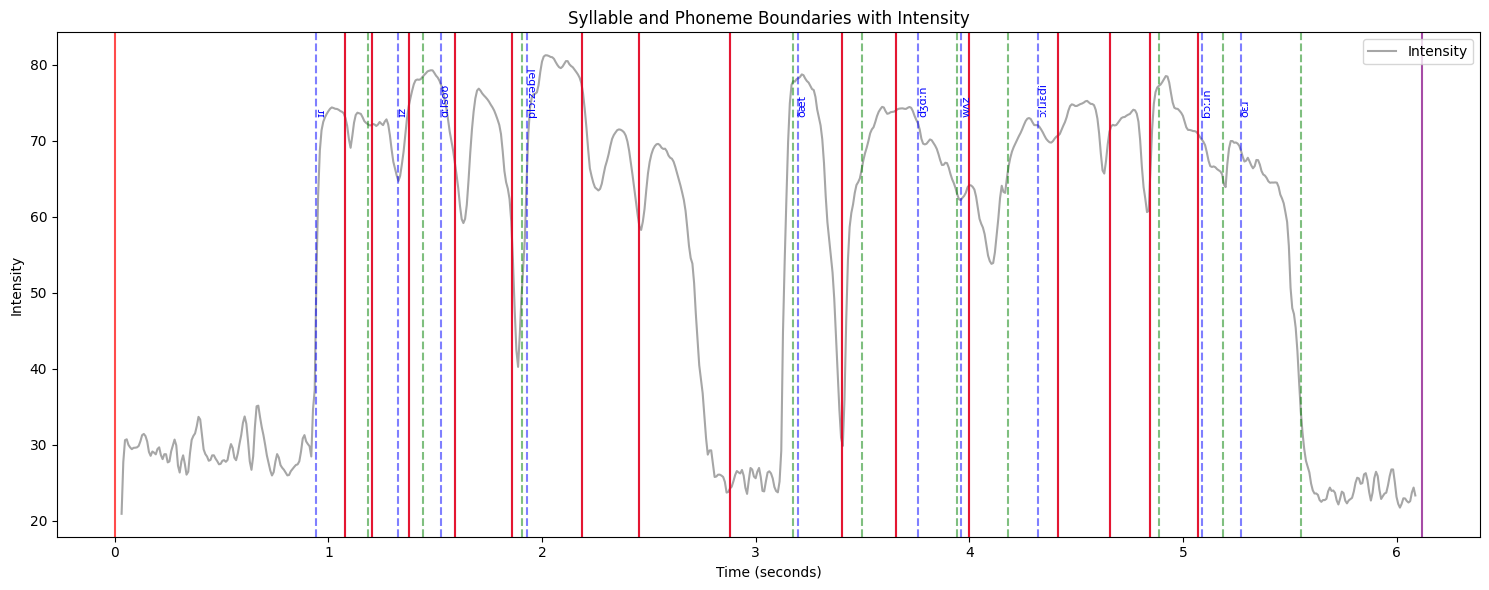

In [ ]:
# Now annotate syllables
for i, (start, end) in enumerate(boundaries):
    # Find the segment closest to the syllable center time (as before)
    center = syllable_times[i]

    # For multiple segments
    # closest_segment = min(result["segments"], key=lambda s: abs(center - s["start"]))
    closest_segment = result["segments"][0]

    # Filter words/phonemes inside the syllable boundaries
    # phonemes_in_syllable = [
    #     w for w in closest_segment["words"] if w["start"] >= start and w["end"] <= end
    # ]
    phonemes_in_syllable = []
    for w in closest_segment["words"]:
        if w["start"] >= start and w["end"] <= end:
            phonemes_in_syllable.append(w)

    # print(phonemes_in_syllable)
    # Extract the phoneme texts
    phoneme_texts = [w["word"] for w in phonemes_in_syllable]

    # Join phonemes/words as text for this syllable
    text_in_syllable = " ".join(phoneme_texts)

    annotated_syllables.append(
        {
            "syllable_index": i,
            "center_time": center,
            "text": text_in_syllable if text_in_syllable else closest_segment["text"],
            "phonemes": (
                phoneme_texts
                if phoneme_texts
                else [w["word"] for w in closest_segment["words"]]
            ),
            "pitch": float(pitch.get_value_at_time(center)),
            "intensity": float(intensity.get_value(center)),
            "spectral_band_0": (

            ),
        }
    )


from pprint import pprint

pprint(annotated_syllables)

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))

# # Plot intensity (or waveform) over time
plt.plot(intensity_times, intensity_values, label="Intensity", color="gray", alpha=0.7)

# # Plot phoneme boundaries with labels
for segment in result["segments"]:
    for word in segment["words"]:
        start = word["start"]
        end = word["end"]
        plt.axvline(start, color="blue", linestyle="--", alpha=0.5)
        plt.axvline(end, color="green", linestyle="--", alpha=0.5)
        plt.text(
            start,
            max(intensity_values) * 0.9,
            word["word"],
            rotation=90,
            verticalalignment="bottom",
            color="blue",
            fontsize=8,
        )

# Plot syllable boundaries
for start, end in boundaries:
    plt.axvline(start, color="red", linestyle="-", alpha=0.7)
    plt.axvline(end, color="purple", linestyle="-", alpha=0.7)

# Plot syllable centers as points
# plt.scatter(
#     syllable_times,
#     [max(intensity_values) * 0.8] * len(syllable_times),
#     color="green",
#     label="Syllable Centers",
# )

plt.xlabel("Time (seconds)")
plt.ylabel("Intensity")
plt.title("Syllable and Phoneme Boundaries with Intensity")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Check the vocabulary characters of the wav2vec model
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("facebook/wav2vec2-xlsr-53-espeak-cv-ft")

vocab_dict1 = tokenizer.get_vocab()







In [ ]:
# Check the vocabulary characters of the wav2vec model
from transformers import AutoTokenizer

tokenizer2 = AutoTokenizer.from_pretrained("facebook/wav2vec2-lv-60-espeak-cv-ft")

vocab_dict2 = tokenizer2.get_vocab()


In [ ]:
if vocab_dict1 == vocab_dict2:
    print("Outputs are the same")
else:
    print("Outputs are different")

Outputs are the same
